In [1]:
import pandas as pd


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import silhouette_score

# Load dataset
file_path = "AIB503_ECA Data_Jan 25 V2 (6 Feb 25).csv"
df = pd.read_csv(file_path)
df=df[:100]
# Display basic info and first few rows
display(df.info())
display(df.head())

# Drop unnecessary columns
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy="median")
df['Arrival Delay in Minutes'] = imputer.fit_transform(df[['Arrival Delay in Minutes']])

# Convert 'satisfaction' column to numerical
if 'satisfaction' in df.columns:
    df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

# Convert categorical variables to numeric using One-Hot Encoding
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Split data into training (90%) and test (10%)
train_data, test_data = train_test_split(df_scaled, test_size=0.1, random_state=42)

# Finding optimal K using Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Checking K from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(train_data, kmeans.labels_))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         100 non-null    int64  
 1   id                                 100 non-null    int64  
 2   Gender                             100 non-null    object 
 3   Customer Type                      100 non-null    object 
 4   Age                                100 non-null    int64  
 5   Type of Travel                     100 non-null    object 
 6   Class                              100 non-null    object 
 7   Flight Distance                    100 non-null    int64  
 8   Inflight wifi service              100 non-null    int64  
 9   Departure/Arrival time convenient  100 non-null    int64  
 10  Ease of Online booking             100 non-null    int64  
 11  Gate location                      100 non-null    int64  


None

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

In [6]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,1
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,0
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,0


Text(0.5, 1.0, 'Age Distribution')

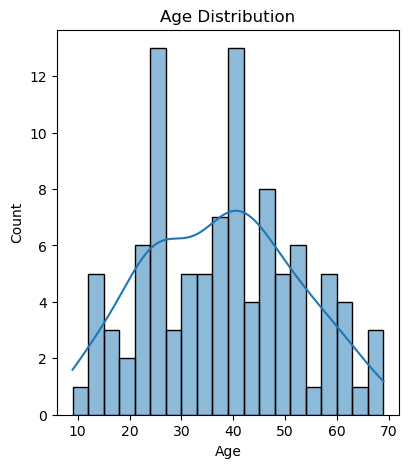

In [2]:
# Data visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Flight Distance vs. Arrival Delay')

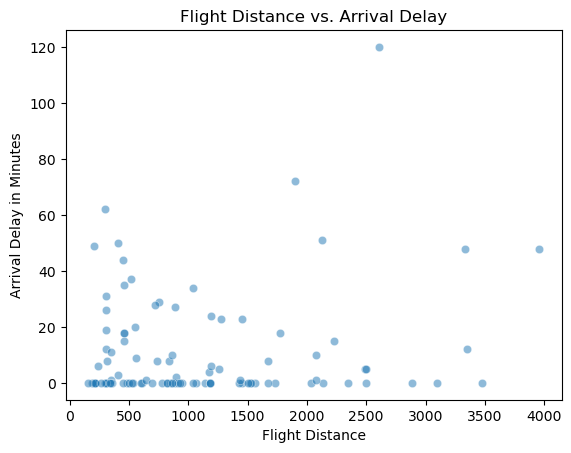

In [3]:
plt.subplot(1, 1, 1)
sns.scatterplot(x=df['Flight Distance'], y=df['Arrival Delay in Minutes'], alpha=0.5)
plt.title("Flight Distance vs. Arrival Delay")

Text(0.5, 1.0, 'Feature Correlation Heatmap')

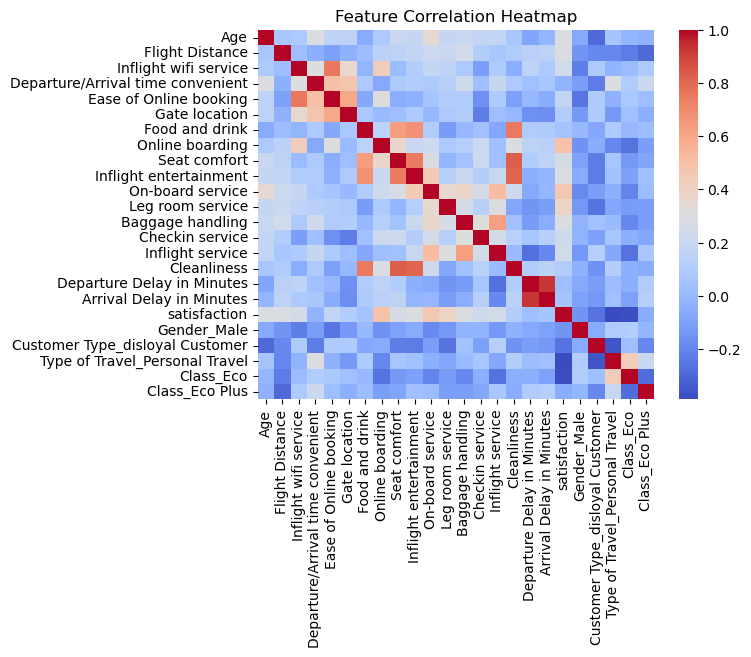

In [4]:
plt.subplot(1, 1, 1)
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")

# plt.tight_layout()
# plt.show()

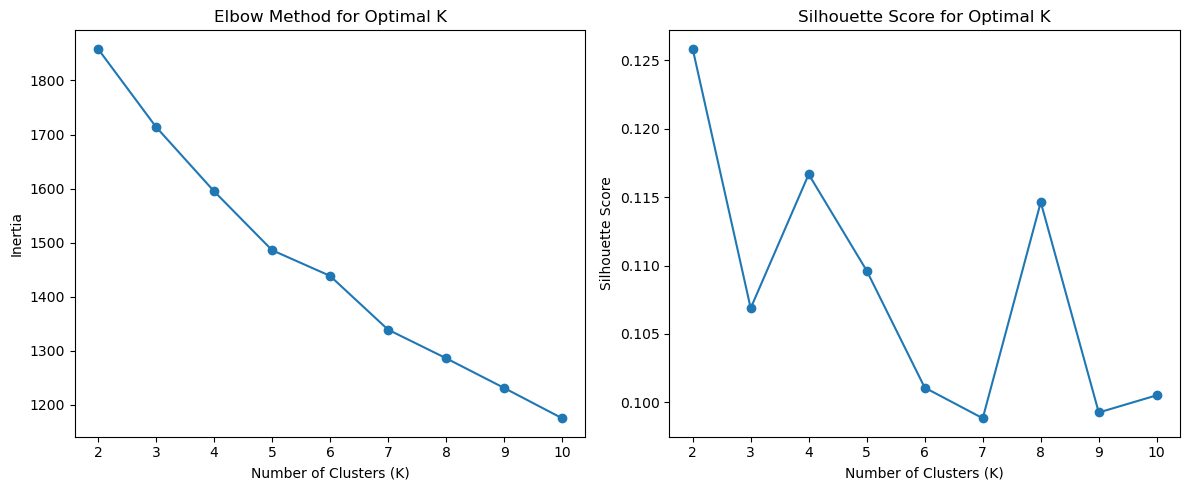

In [5]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.tight_layout()
plt.show()



In [6]:
# Finding the best K based on the highest silhouette score
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters: {optimal_k}')

# Train K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(train_data)
train_data['Cluster'] = kmeans.labels_

# Display cluster counts for training data
print("Cluster distribution in training data:")
print(train_data['Cluster'].value_counts())



Optimal number of clusters: 2


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster distribution in training data:
Cluster
0    47
1    43
Name: count, dtype: int64


In [7]:
# Save model
joblib.dump(kmeans, "kmeans_model.pkl")

# Inference: Predict clusters for test data
test_data_clusters = kmeans.predict(test_data)
test_data['Cluster'] = test_data_clusters

# Display cluster counts for test data
print("Cluster distribution in test data:")
print(test_data['Cluster'].value_counts())

Cluster distribution in test data:
Cluster
0    6
1    4
Name: count, dtype: int64


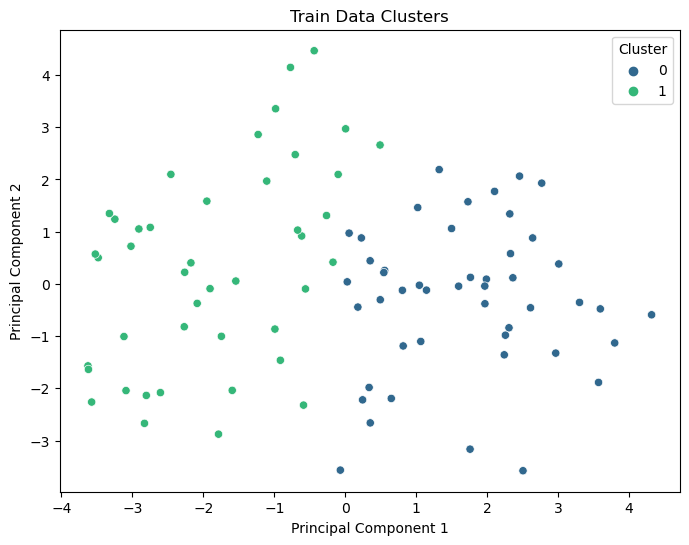

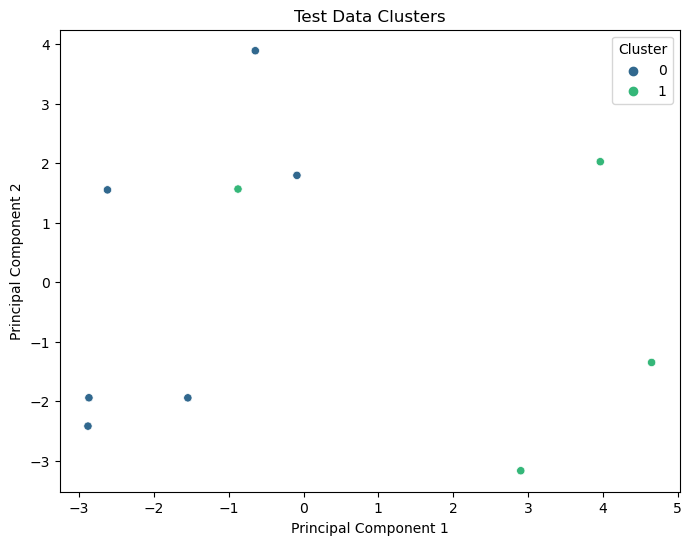

In [8]:
# Visualizing clusters using PCA
def plot_clusters(data, labels, title):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='viridis')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(title)
    plt.legend(title="Cluster")
    plt.show()

plot_clusters(train_data.drop(columns=['Cluster']), train_data['Cluster'], "Train Data Clusters")
plot_clusters(test_data.drop(columns=['Cluster']), test_data['Cluster'], "Test Data Clusters")

In [9]:
# Analyze cluster characteristics
cluster_analysis = train_data.groupby('Cluster').mean()
print("Cluster Characteristics:")
print(cluster_analysis)
cluster_labels = {}
for cluster_id in cluster_analysis.index:
    cluster_mean = cluster_analysis.loc[cluster_id]
    
    # Consider multiple factors: satisfaction, travel type, class, etc.
    if cluster_mean['satisfaction'] > 0.6:
        cluster_labels[cluster_id] = 'Highly Satisfied Passengers'
    elif cluster_mean['satisfaction'] > 0.3:
        cluster_labels[cluster_id] = 'Moderately Satisfied Passengers'
    else:
        cluster_labels[cluster_id] = 'Neutral or Dissatisfied Passengers'

print("Cluster Labels:")
print(cluster_labels)

def assign_labels(cluster_id):
    return cluster_labels.get(cluster_id, 'Unknown')

test_data['Cluster Label'] = test_data['Cluster'].apply(assign_labels)
print("Test Data with Labels:")
test_data[['Cluster', 'Cluster Label']].head()



Cluster Characteristics:
              Age  Flight Distance  Inflight wifi service  \
Cluster                                                     
0        0.477671         0.260406               0.306390   
1       -0.455012        -0.281949              -0.257905   

         Departure/Arrival time convenient  Ease of Online booking  \
Cluster                                                              
0                                 0.272566                0.289415   
1                                -0.222943               -0.258360   

         Gate location  Food and drink  Online boarding  Seat comfort  \
Cluster                                                                 
0             0.247351        0.216773         0.373892      0.352299   
1            -0.237787       -0.270076        -0.499160     -0.442783   

         Inflight entertainment  ...  Inflight service  Cleanliness  \
Cluster                          ...                                  
0             

,Cluster,Cluster Label
83,1,Neutral or Dissatisfied Passengers
53,1,Neutral or Dissatisfied Passengers
70,0,Highly Satisfied Passengers
45,0,Highly Satisfied Passengers
44,0,Highly Satisfied Passengers


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


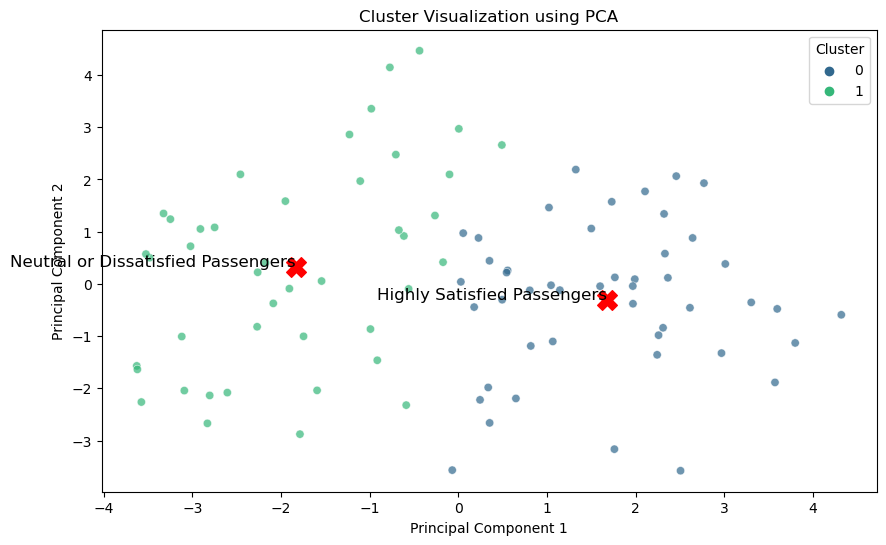

In [10]:
from sklearn.decomposition import PCA
# PCA for visualization
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(train_data.drop(columns=['Cluster']))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=train_data['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization using PCA')
plt.legend(title='Cluster')

# Annotate cluster centers
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
for i, txt in enumerate(cluster_labels.values()):
    plt.scatter(cluster_centers_pca[i, 0], cluster_centers_pca[i, 1], marker='X', s=200, color='red')
    plt.text(cluster_centers_pca[i, 0], cluster_centers_pca[i, 1], txt, fontsize=12, ha='right', color='black')

plt.show()

# 1. Features Used for Clustering
K-Means clusters passengers based on multiple numerical and categorical features. The most relevant attributes include:

- Satisfaction Score (converted to numerical: 1 = Satisfied, 0 = Neutral or Dissatisfied)
- Type of Travel (Business or Personal)
- Customer Type (Loyal or New)
- Flight Class (Economy, Business, First)
- Flight Distance & Delay Times
- Other service ratings (Seat comfort, Check-in service, In-flight entertainment, etc.)
By grouping passengers based on these factors, K-Means forms clusters that represent different types of passengers.

# 2.Assign Labels to Clusters
After clustering, we analyze cluster characteristics by averaging the feature values per cluster.

If a cluster has a high average satisfaction score (>0.5), we label it as “Satisfied Passengers”.
If a cluster has a low satisfaction score (≤0.5), we label it as “Neutral or Dissatisfied Passengers”.

# 3.Why We May Get Only Two Clusters
The Elbow Method and Silhouette Score determined the best number of clusters (optimal_k).
If the best number is 2, it means that the data naturally separates into two major groups.
One group of satisfied passengers.
Another group of dissatisfied passengers.
If you want more detailed segmentation, try setting optimal_k = 3 or 4 manually.

# 4 How Airlines Can Use These Clusters
Once we segment passengers, airlines can: 
- Improve services for dissatisfied passengers by addressing pain points (e.g., long delays, poor seat comfort).
- Reward loyal and satisfied passengers with exclusive perks (e.g., free upgrades, lounge access).
- Personalize marketing based on passenger types (e.g., business vs. leisure).

# Question 1c
• Appraise and interpret each airline passenger segments obtained from the clustering 
process based on their attributes.
• Provide insights and recommendations for the airline company based on the 
identified passenger segments. How can the company leverage these segments for 
passenger satisfaction improvements?

## From the clustering process, we identified two distinct segments:
- Neutral or Dissatisfied Passengers---	Lower satisfaction score, higher delays, mostly economy class, lower service ratings.
- Satisfied Passengers----	Higher satisfaction score, fewer delays, premium/business class, higher service ratings.

# Insights from Cluster Analysis
-  Cluster 0 - Neutral or Dissatisfied Passengers

Tend to experience more flight delays.
Majority belong to economy class.
Lower ratings for check-in service, in-flight entertainment, and seat comfort.
- Cluster 1 - Satisfied Passengers

Usually have fewer delays.
More passengers in business or first class.
Higher ratings for check-in, seat comfort, and in-flight services.

# Recommendations for the Airline
- Improve Customer Experience in Economy Class

- Enhance seating comfort.
Improve entertainment options.
Offer better meal options for economy passengers.
- Reduce Flight Delays

- Optimize scheduling and ground operations.
Improve communication about delays to affected passengers.
- Enhance Check-in and Boarding Experience

Streamline check-in processes.
Offer priority boarding for frequent travelers.
- Personalized Promotions for Dissatisfied Passengers

Offer discounts, vouchers, or loyalty perks to encourage repeat travel.
Use feedback to target dissatisfied passengers with better offers.